# Computational Homework #1

**Due in class on Wednesday September 2, 2020 at 11:59PM**. Answer all of the following problems. These problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 

## Problem #1

(Same setup as theoretical problem 2): The random variable $X$ can take on the values 0,1,2, and 3 with probabilities $P(X = 0) = p^3$, $P(X = 1) = (1-p)p^2$, $P(X = 2) = (1-p)^2$, and $P(X = 3) = 2p(1-p)$, where $0 < p < 1$. Graph the log likelihood function in R and place a  vertical line at the MLE found in theoretical problem 2. Does it look like the correct maximizer?


Answer: 


From the computation, the MLE found in theoretical problem 2 is 0.582. On the graph, the vertical line looks like the maximizer of the log likelihood function. 


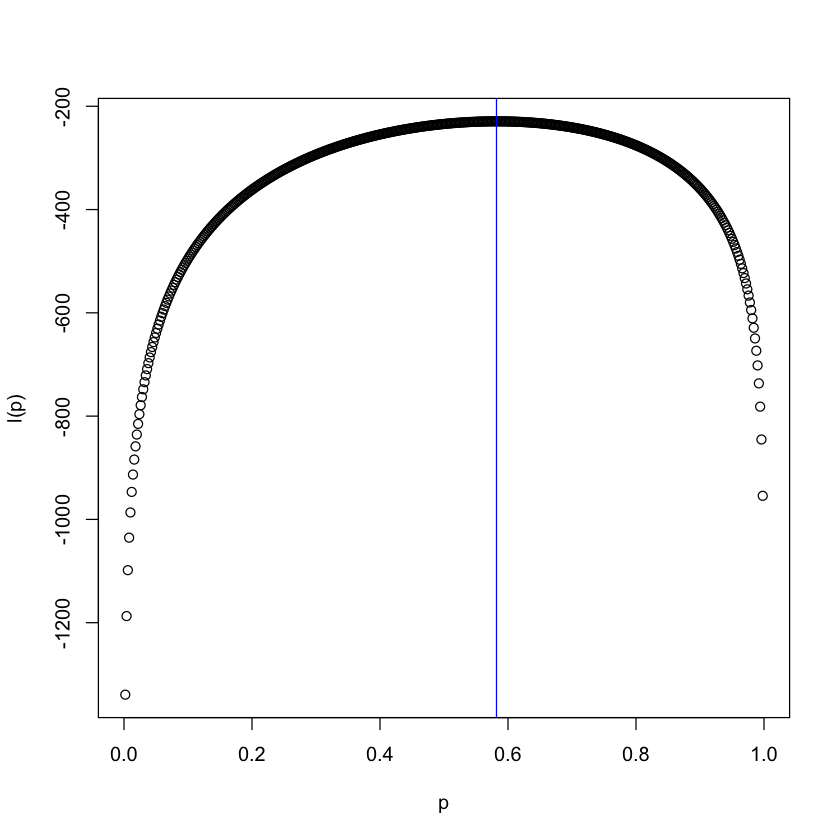

In [1]:
l = function(p){
    l = 24*log(p^3)+54*log(p^2-p^3) + 32*log((1-p)^2) + 40*log(2*p-2*p^2)
    return(l)
}

p = seq(0,1,length = 500);
plot(p,l(p))
abline(v=0.582, col="blue")


In [ ]:
## Problem #2

In this problem, we will look at the distribution of a particular maximum likelihood estimator (MLE). Remember from class that the MLE is an *estimator*, and as such, it has a probability distribution (because estimators are function of random variables, and thus, are random).

#### (a) Generate $m = 500$ iid samples of size $n=10$ from an exponential distribution with rate $\lambda = 1$. Your result (which you shouldn't print) should be a matrix where each column is a sample of size $n=10$. There should be $m = 500$ columns. 

Note: You can generate a single iid sample of size $n$ using the rexp() function. Also note that you should be able to generate the $m$ samples without using a loop!


In [1]:
# Problem 2 part a

lambda = 1

n=10

#repeat the generate iid sample of 10 size code 500 times, results in a matrix of 500 columns and 10 rows
#each column represents a sample of size 10

p2matrix <- matrix(replicate(500,rexp(n,rate=lambda)),nrow=10,ncol=500)

#self-check code to print
#print(p2matrix)

#### (b) For each sample (each column), calculate the MLE of $\lambda$, denoted $\widehat\lambda$, using the formula derived in theoretical problem 5. The result should be a vector of size $m$. Call it mle. Since $m$ is large, this mle vector should be a good approximation of the true distribution of $\widehat\lambda$. Construct a histogram of mle and comment on its distribution: where is it centered? is it symmetric or skewed? high or low variability (with respect to the original population)?



Answer: the histogram is skewed with low variability

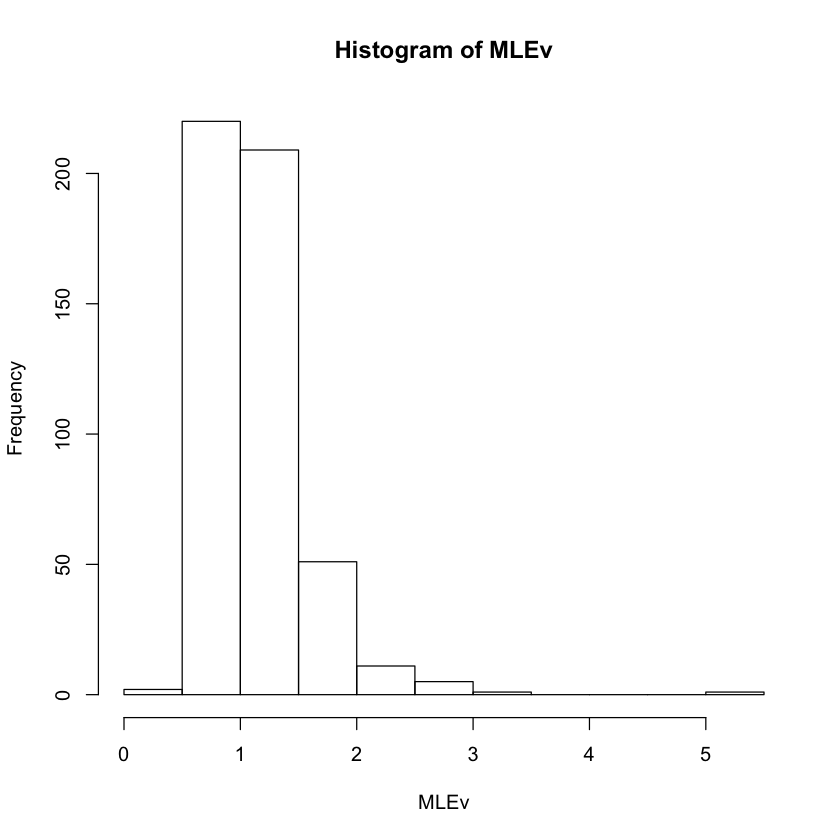

In [2]:
#create a vector of 500 size
MLEv <- c(1:500)

sum=0
iteration=1

#from problem 4, MLE is n/(sum of sample values)

for(col in 1:ncol(p2matrix) ){
   for(row in 1:nrow(p2matrix)){
       sum=sum+p2matrix[row,col]
   }
    MLEv[iteration]=10/sum
    sum=0
    iteration=iteration+1
}

hist(MLEv)
#print(MLEv)


In [ ]:
#### (c) Now, using the result in theoretical problem 5b, calculate the MLE for the population mean (i.e., the expected value of the exponential distribution) for each sample that you constructed in part (a). call the resulting vector mle_mean. Then construct a histogram of mle_mean and comment on its distribution.

Answer: The histogram looks similar to being normally distributed

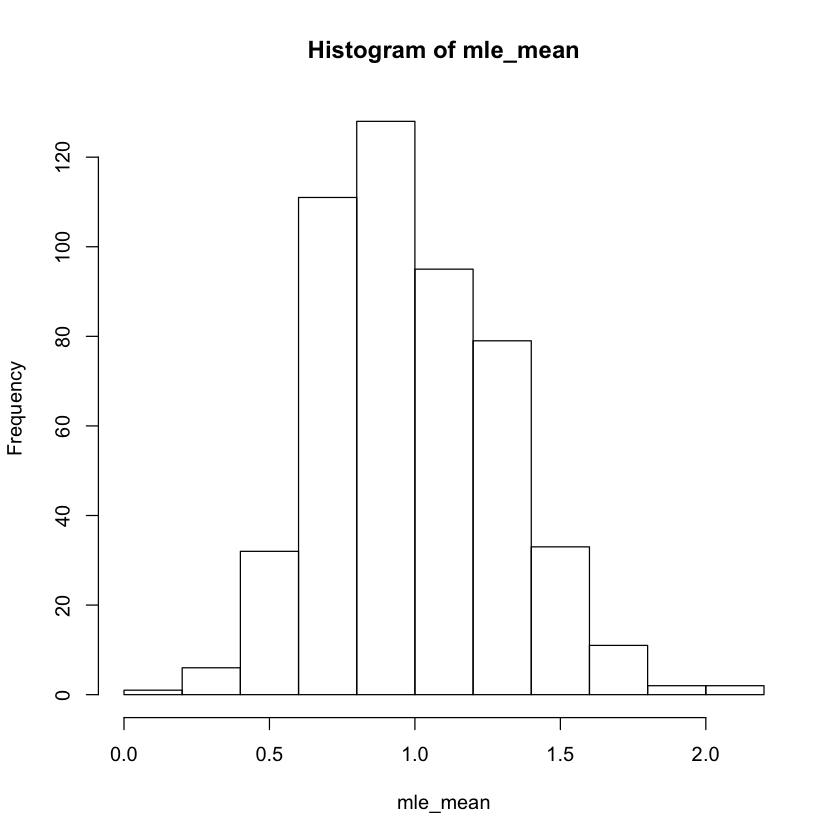

In [3]:
mle_mean <- c(1:500)

sum=0
iteration=1

for(col in 1:ncol(p2matrix) ){
   for(row in 1:nrow(p2matrix)){
       sum=sum+p2matrix[row,col]
   }
    mle_mean[iteration]=sum/10
    sum=0
    iteration=iteration+1
}

hist(mle_mean)


#### (d) Repeat parts (a)-(c) of this question, but change the sample size to $n = 100$. What do you notice about the shape of  the resulting distributions? In the case of the MLE for the mean, what theorem (discussed in class and in applied probability) is this an example of?

Answer: 
The shape of the resulting distributions looks more similar to being normally distributed. I think it's an example of the central limit theorum. 

In [4]:
lambda = 1

n=100

p3matrix <- matrix(replicate(500,rexp(n,rate=lambda)),nrow=100,ncol=500)

#print(p3matrix)

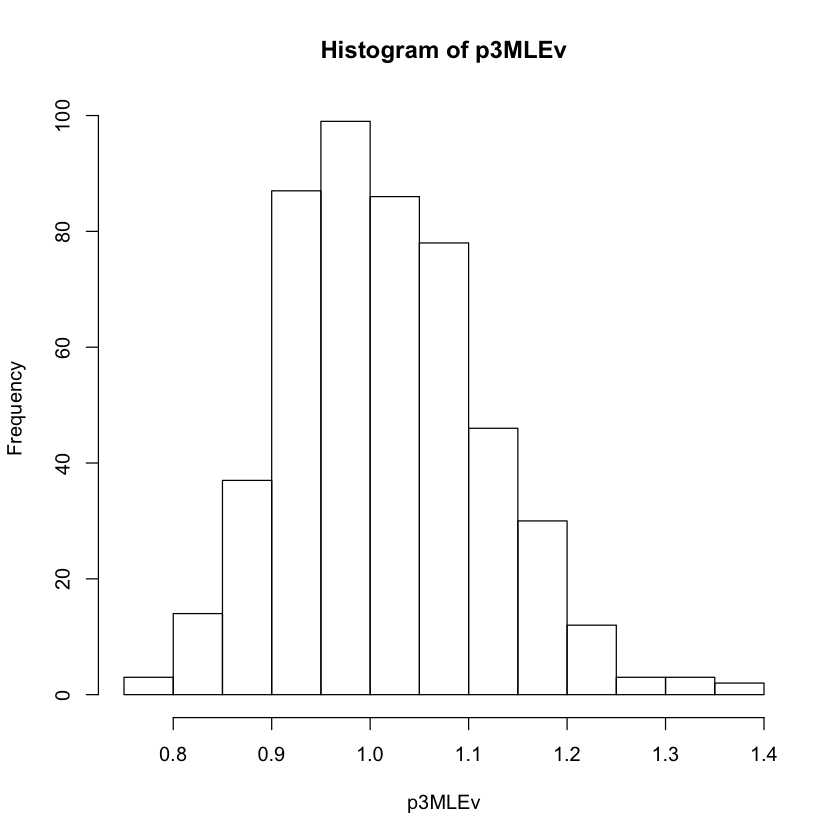

In [5]:
p3MLEv <- c(1:500)

sum=0
iteration=1

for(col in 1:ncol(p3matrix) ){
   for(row in 1:nrow(p3matrix)){
       sum=sum+p3matrix[row,col]
   }
    p3MLEv[iteration]=100/sum
    sum=0
    iteration=iteration+1
}

hist(p3MLEv)

#print(p3MLEv)

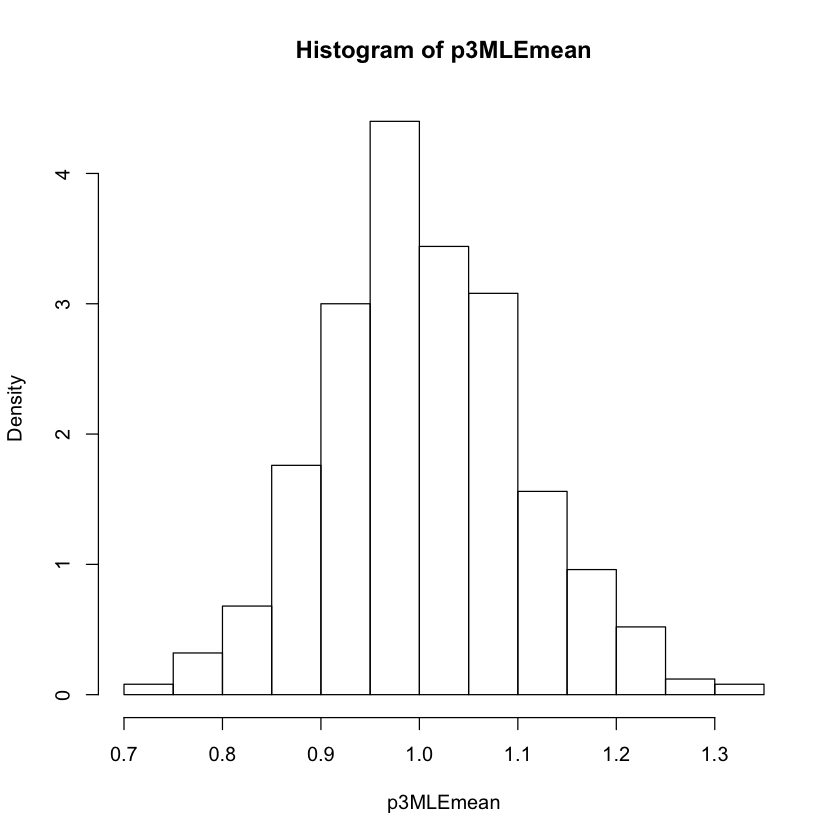

In [85]:
p3MLEmean <- c(1:500)

sum=0
iteration=1

for(col in 1:ncol(p3matrix) ){
   for(row in 1:nrow(p3matrix)){
       sum=sum+p3matrix[row,col]
   }
    p3MLEmean[iteration]=sum/100
    sum=0
    iteration=iteration+1
}

hist(p3MLEmean,prob=TRUE,breaks=20)